In [1]:
import pandas as pd
import numpy as np

from numpy.polynomial import Polynomial
from numpy import poly1d, polyfit

from scipy import integrate

import  matplotlib.pyplot as plt

In [2]:
qx = pd.read_csv('life_tables.csv', sep=';', decimal=',')
qx = qx['AT_49_F']

# Calculando  função contínua de tpx

In [180]:
class Ax_continuo:
    
    def __init__(self, qx):
        self.qx = np.array(qx)
        self.age = None
        self.continuous_fitted = 'Not fitted yet.'
        self.funtion_tpx = 'Not fitted yet.'
        self.Ax_integral = 'Not defined yet.'
    
    def tpx_discreta(self, age):
        self.age = age
        px = 1 - self.qx
        tpx = lambda t: np.prod(px[age:age+t])
        self.function_tpx = tpx
    
    def fit(self, x, y, deg):
        x = np.array(x)
        y = np.array(y)

        f = polyfit(x, y, deg=deg)
        print(Polynomial(f))
        self.continuous_fitted = poly1d(f)
        
        return self
    
    def mu_force(self, t):
        
        if self.continuous_fitted == 'Not fitted yet.':
            raise Exception('Continuous survival function is not fitted yet.')
        
        mu = -1/self.continuous_fitted(t) * self.continuous_fitted.deriv()(t)
        
        return mu
    
    def define_integral(self, delta):
        
        if self.continuous_fitted == 'Not fitted yet.':
            raise Exception('Continuous survival function is not fitted yet.')
            
        if self.mu_force == 'Not fitted yet.':
            raise Exception('Mortality force function is not fitted yet.')
        
        f = lambda time: self.mu_force(time)*np.exp(-time*delta)*self.continuous_fitted(time)
        
        self.Ax_integral = f
    
    def premium(self, contract, B=1):
        
        if self.Ax_integral == 'Not defined yet.':
            raise Exception('Integral is not defined yet.')
            
        to_integrate = self.Ax_integral
        
        return integrate.quad(to_integrate, a=0, b=contract) * B

In [187]:
teste = Ax_continuo(qx=qx)

In [188]:
teste.tpx_discreta(age=10)

In [193]:
x = np.arange(0, 70)
y = [teste.function_tpx(t) for t in x]
teste.fit(x, y, deg=10);

-2.648676597713516e-18 + 1.212241704539406e-15·x¹ -
2.1026465904867106e-13·x² + 1.872861643168603e-11·x³ -
9.598974177939536e-10·x⁴ + 2.9234305437630895e-08·x⁵ -
5.315264232567946e-07·x⁶ + 5.386489821642725e-06·x⁷ -
3.6031120860374546e-05·x⁸ - 0.000127687442678989·x⁹ +
0.9999828342728148·x¹⁰


In [194]:
teste.mu_force(3)

0.0002454625957962272

In [195]:
teste.define_integral(delta=.1)

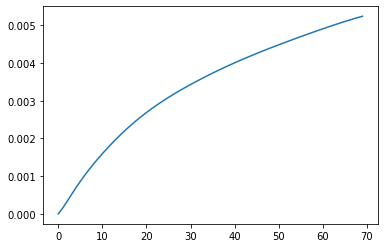

In [196]:
premio = [teste.premium(B=1, contract=c)[0] for c in range(70)]

plt.plot(np.arange(0,70), premio)